# Jonathan Halverson
# Keeping it Fresh: Predict Restaurant Inspections
## Part 2: Yelp business data

This notebook examines the health inspection violation data as well as the Yelp business data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### Load the training data, translation data and Yelp business data:

In [3]:
from helper_methods import drop_duplicate_inspections

df = pd.read_csv('data/training_labels.txt', parse_dates=['date'])
df = df.sort_values(['restaurant_id', 'date'])
df = drop_duplicate_inspections(df, threshold=60)
df.head()

,id,date,restaurant_id,*,**,***
1801,28144,2007-09-21,0ZED0WED,3,1,0
551,24765,2008-03-26,0ZED0WED,3,1,0
5460,25193,2008-10-08,0ZED0WED,6,2,4
3641,12775,2009-03-03,0ZED0WED,3,0,0
18452,25850,2009-07-23,0ZED0WED,1,0,2


In [4]:
trans = pd.read_csv('data/restaurant_ids_to_yelp_ids.csv')
trans = trans[trans['yelp_id_1'].isnull()]
trans.drop(['yelp_id_1', 'yelp_id_2', 'yelp_id_3'], axis=1, inplace=True)
trans.columns = ['restaurant_id', 'business_id']
trans.head()

,restaurant_id,business_id
0,Y1Em4GOw,5Kdf1DGbRScRk6Cx3jaX8w
1,KAoKP6Og,Urw6NASrebP6tyFdjwjkwQ
2,WeEe7eoa,xlOE7jqbW1Q_PrvLBVlegQ
3,V430mqoB,ktYpqtygWIJ2RjVPGTxNaA
4,ekE4Qz32,n8CsQy7Iy1IMhP85hPVKPA


In [53]:
from helper_methods import read_json

df_biz = read_json('data/yelp_academic_dataset_business.json')
df_biz['price_range'] = df_biz.attributes.apply(lambda x: x['Price Range'] if 'Price Range' in x.keys() else 0)
df_biz.head(3).transpose()

,0,1,2
attributes,"{u'Price Range': 1, u'Accepts Credit Cards': T...","{u'Take-out': True, u'Price Range': 1, u'Outdo...","{u'Take-out': True, u'Price Range': 1, u'Outdo..."
business_id,Jp9svt7sRT4zwdbzQ8KQmw,CgdK8DiyX9Y4kTKEPi_qgA,SAnMTC1rm-PhP8DQC4zeyg
categories,"[Bakeries, Food, Event Planning & Services, Ca...","[Delis, Restaurants, Event Planning & Services...","[Delis, Restaurants]"
city,Boston,Boston,Boston
full_address,"75 Federal Street\nFinancial District\nBoston,...","8 City Hall Ave\nBeacon Hill\nBoston, MA 02108","2 Center Plz\nDowntown\nBoston, MA 02108"
hours,{},"{u'Tuesday': {u'close': u'15:00', u'open': u'0...","{u'Tuesday': {u'close': u'16:00', u'open': u'0..."
latitude,42.3551,42.3575,42.3601
longitude,-71.0565,-71.0691,-71.0602
name,Rebecca's Cafe,Delicato Cafe & Caterer,Plaza Deli
neighborhoods,[Financial District],[Beacon Hill],[Downtown]


Let's work with the restaurant name instead of the restaurant_id:

In [54]:
name_id_yelp = pd.merge(trans, df_biz, on='business_id', how='inner')
name_id_yelp.head(3).transpose()

,0,1,2
restaurant_id,Y1Em4GOw,KAoKP6Og,WeEe7eoa
business_id,5Kdf1DGbRScRk6Cx3jaX8w,Urw6NASrebP6tyFdjwjkwQ,xlOE7jqbW1Q_PrvLBVlegQ
attributes,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...","{u'Take-out': True, u'Accepts Credit Cards': T...","{u'Accepts Credit Cards': False, u'Price Range..."
categories,"[Nightlife, Korean, Bars, Restaurants]","[Fast Food, Sandwiches, Restaurants]","[Food, Coffee & Tea]"
city,Allston,Allston,Roslindale
full_address,"90-92 Harvard Ave\nAllston/Brighton\nAllston, ...","260 Western Ave\nAllston/Brighton\nAllston, MA...",2 Belgrade Ave\nRoslindale Village\nRoslindale...
hours,"{u'Monday': {u'close': u'01:00', u'open': u'17...","{u'Monday': {u'close': u'22:00', u'open': u'09...",{}
latitude,42.3533,42.3629,42.2872
longitude,-71.1321,-71.1332,-71.1297
name,Myung Dong 1st Ave,Subway,Emac & Bolio's


### Introduce weighted_violations which is an overall measure of violations

In [7]:
df['weighted_violations'] = 1 * df['*'] + 3 * df['**'] + 5 * df['***']
df.head()

,id,date,restaurant_id,*,**,***,weighted_violations
1801,28144,2007-09-21,0ZED0WED,3,1,0,6
551,24765,2008-03-26,0ZED0WED,3,1,0,6
5460,25193,2008-10-08,0ZED0WED,6,2,4,32
3641,12775,2009-03-03,0ZED0WED,3,0,0,3
18452,25850,2009-07-23,0ZED0WED,1,0,2,11


Compute the average violations for each restaurant (one may also consider the median):

In [8]:
avg_violations = df.groupby('restaurant_id').agg({'*': [np.size, np.mean, np.sum], '**': [np.mean, np.sum], '***': [np.mean, np.sum], 'weighted_violations': [np.mean, np.sum]})
avg_violations.sort_values([('weighted_violations', 'mean')], ascending=False).head(5)

weighted_violations         *                      ***      \
                             mean  sum size       mean sum      mean sum   
restaurant_id                                                              
N6OkRvox                50.000000  100    2  19.000000  38  5.000000  10   
VpoGe9Er                38.000000   38    1   7.000000   7  5.000000   5   
ZBEnAqOY                32.666667   98    3   8.333333  25  3.666667  11   
N6OkxvEx                28.000000   84    3   7.666667  23  3.666667  11   
WwOapwoB                28.000000   28    1  18.000000  18  2.000000   2   

                     **      
                   mean sum  
restaurant_id                
N6OkRvox       2.000000   4  
VpoGe9Er       2.000000   2  
ZBEnAqOY       2.000000   6  
N6OkxvEx       0.666667   2  
WwOapwoB       0.000000   0

In [55]:
biz_violations = pd.merge(name_id_yelp, avg_violations, left_on='restaurant_id', right_index=True, how='inner')
biz_violations.head(3).transpose()

,0,1,2
restaurant_id,Y1Em4GOw,KAoKP6Og,WeEe7eoa
business_id,5Kdf1DGbRScRk6Cx3jaX8w,Urw6NASrebP6tyFdjwjkwQ,xlOE7jqbW1Q_PrvLBVlegQ
attributes,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...","{u'Take-out': True, u'Accepts Credit Cards': T...","{u'Accepts Credit Cards': False, u'Price Range..."
categories,"[Nightlife, Korean, Bars, Restaurants]","[Fast Food, Sandwiches, Restaurants]","[Food, Coffee & Tea]"
city,Allston,Allston,Roslindale
full_address,"90-92 Harvard Ave\nAllston/Brighton\nAllston, ...","260 Western Ave\nAllston/Brighton\nAllston, MA...",2 Belgrade Ave\nRoslindale Village\nRoslindale...
hours,"{u'Monday': {u'close': u'01:00', u'open': u'17...","{u'Monday': {u'close': u'22:00', u'open': u'09...",{}
latitude,42.3533,42.3629,42.2872
longitude,-71.1321,-71.1332,-71.1297
name,Myung Dong 1st Ave,Subway,Emac & Bolio's


In [10]:
biz_violations.columns = biz_violations.columns[:17].tolist() + map(lambda x: '_'.join([x[0], x[1]]), biz_violations.columns[17:])
biz_violations[['name', 'stars', 'review_count', 'weighted_violations_mean', '*_size', '*_mean', '**_mean','***_mean']].head()

,name,stars,review_count,weighted_violations_mean,*_size,*_mean,**_mean,***_mean
0,Myung Dong 1st Ave,3.5,178,1.000000,1,1.0,0.000000,0.000000
1,Subway,2.5,16,5.400000,5,3.4,0.000000,0.400000
2,Emac & Bolio's,3.5,6,2.000000,2,2.0,0.000000,0.000000
3,Pic a Pasta,3.5,66,5.333333,3,2.0,0.000000,0.666667
4,North of the Border Mexican Grill,4.5,25,10.250000,12,3.5,0.166667,1.250000


Below we list the top 25 restaurants with the highest mean weighted violations:

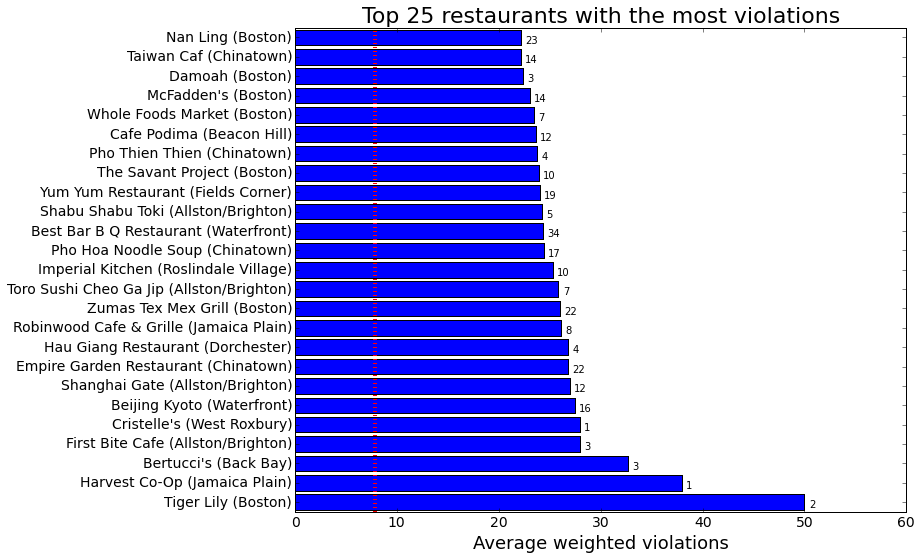

In [11]:
worst25 = biz_violations.sort_values(['weighted_violations_mean'], ascending=False).head(25)
labels = map(lambda x: x.encode('ascii', 'ignore'), worst25.name)
neighborhoods = worst25.neighborhoods.apply(lambda x: '(' + x[0] + ')' if x != [] else '(Boston)')
rest_name_location = [' '.join([label, neighborhood]) for label, neighborhood in zip(labels, neighborhoods)]

fig, ax = plt.subplots(1, 1, figsize=(13, 8))
plt.barh(range(25), worst25['weighted_violations_mean'], align='center')
for i, (vio, num) in enumerate(zip(worst25['weighted_violations_mean'], worst25['*_size'])):
    plt.text(vio + 0.5, i - 0.3, str(num), fontsize=10)
plt.plot([avg_violations.mean()[0], avg_violations.mean()[0]], [-0.5, 25], 'r:', lw=4)
plt.xlim(0, 60)
plt.ylim(-0.5, 24.5)
plt.yticks(range(25), rest_name_location)
plt.title('Top 25 restaurants with the most violations')
plt.xlabel('Average weighted violations')
plt.tight_layout()

Tiger Lily went out of business.

### Let's look for correlations between business properties and the number of violations

(0, 30)

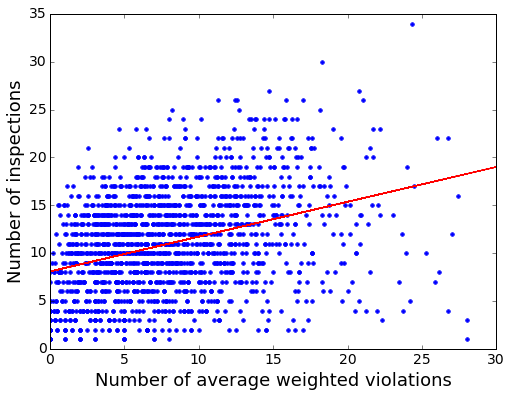

In [12]:
x = biz_violations['weighted_violations_mean']
y = biz_violations['*_size']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m * x + b, 'r-')
plt.xlabel('Number of average weighted violations')
plt.ylabel('Number of inspections')
plt.xlim(0, 30)

In [13]:
from scipy.stats import pearsonr, spearmanr
print pearsonr(biz_violations['weighted_violations_mean'], biz_violations['*_size'])
print spearmanr(biz_violations['weighted_violations_mean'], biz_violations['*_size'])

(0.36019076455688287, 1.4422762458847863e-56)
SpearmanrResult(correlation=0.38747350313099899, pvalue=6.5419895076453338e-66)


We see that there is a correlation between number of inspections and mean weighted violations. This suggests that inspectors are returning to the restaurants with the worst hygiene.

### Mean violations as a function of the restaurant price range. Are expensive restaurants cleaner in the kitchen?

(0, 5)

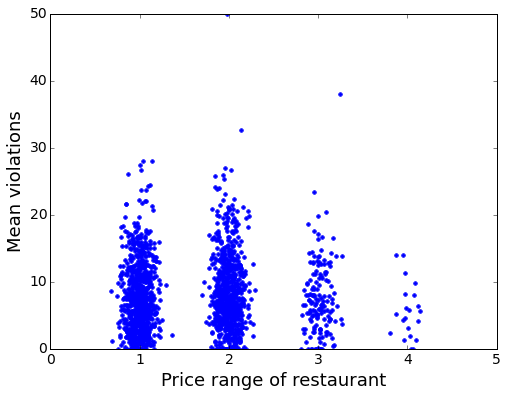

In [14]:
prices = [price + np.random.normal(loc=0.0, scale=0.1) for price in biz_violations[biz_violations['price_range'] != 0].price_range]
plt.plot(prices, biz_violations[biz_violations['price_range'] != 0].weighted_violations_mean, '.')
plt.xlabel('Price range of restaurant')
plt.ylabel('Mean violations')
plt.xlim(0, 5)

In [15]:
pearsonr(biz_violations[biz_violations['price_range'] != 0].price_range, biz_violations[biz_violations['price_range'] != 0].weighted_violations_mean)

(0.0084902153924064517, 0.72075226239132328)

This shows that there is no correlation between the price range of a restaurant and the number of violations.

### Neighborhoods, categories and attributes

Let's look at the mean one-star violations as a function of neighborhood:

In [16]:
violation_label = []
neighborhoods = set(biz_violations['neighborhoods'].sum())
for neighborhood in neighborhoods:
    msk = biz_violations.neighborhoods.apply(lambda x: neighborhood in x)
    violation = biz_violations[msk]['*_mean'].mean()
    _ = biz_violations[~msk]['*_mean'].mean() # this is almost always equal to 3.4
    num_rest = biz_violations[msk]['*_mean'].size
    violation_label.append((violation, neighborhood, num_rest))
violation_label.sort()
violations, labels, num_rest = zip(*violation_label)

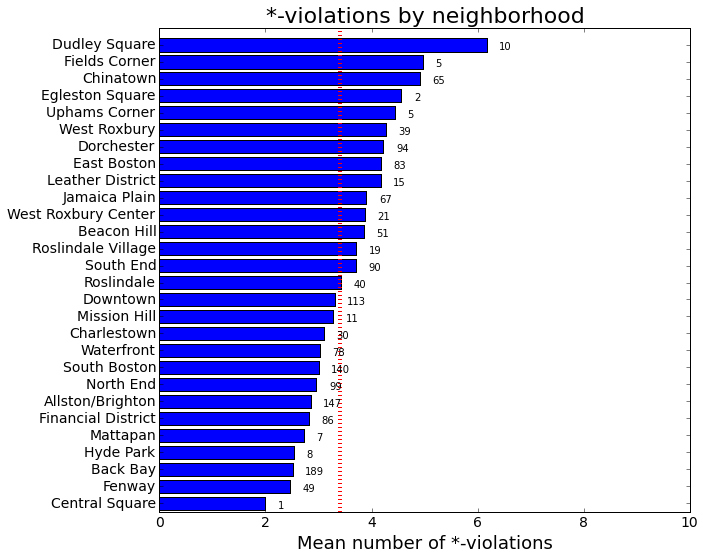

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.barh(range(len(labels)), violations, align='center')
plt.plot([3.4, 3.4], [-0.5, len(labels)], 'r:', lw=4)
for i, (num, vio) in enumerate(zip(num_rest, violations)):
    plt.text(vio + 0.25, i - 0.3, str(num), fontsize=10)
plt.xlim(0, 10)
plt.ylim(-0.5, len(labels))
plt.yticks(range(len(labels)), labels)
plt.title('*-violations by neighborhood')
plt.xlabel('Mean number of *-violations')
plt.tight_layout()

In [18]:
violation_label = []
categories = set(biz_violations['categories'].sum())
for category in categories:
    msk = biz_violations.categories.apply(lambda x: category in x)
    violation = biz_violations[msk]['*_mean'].mean()
    _ = biz_violations[~msk]['*_mean'].mean()
    num_rest = biz_violations[msk]['*_mean'].size
    violation_label.append((violation, category, num_rest))
violation_label.sort()
violations, labels, num_rest = zip(*violation_label)

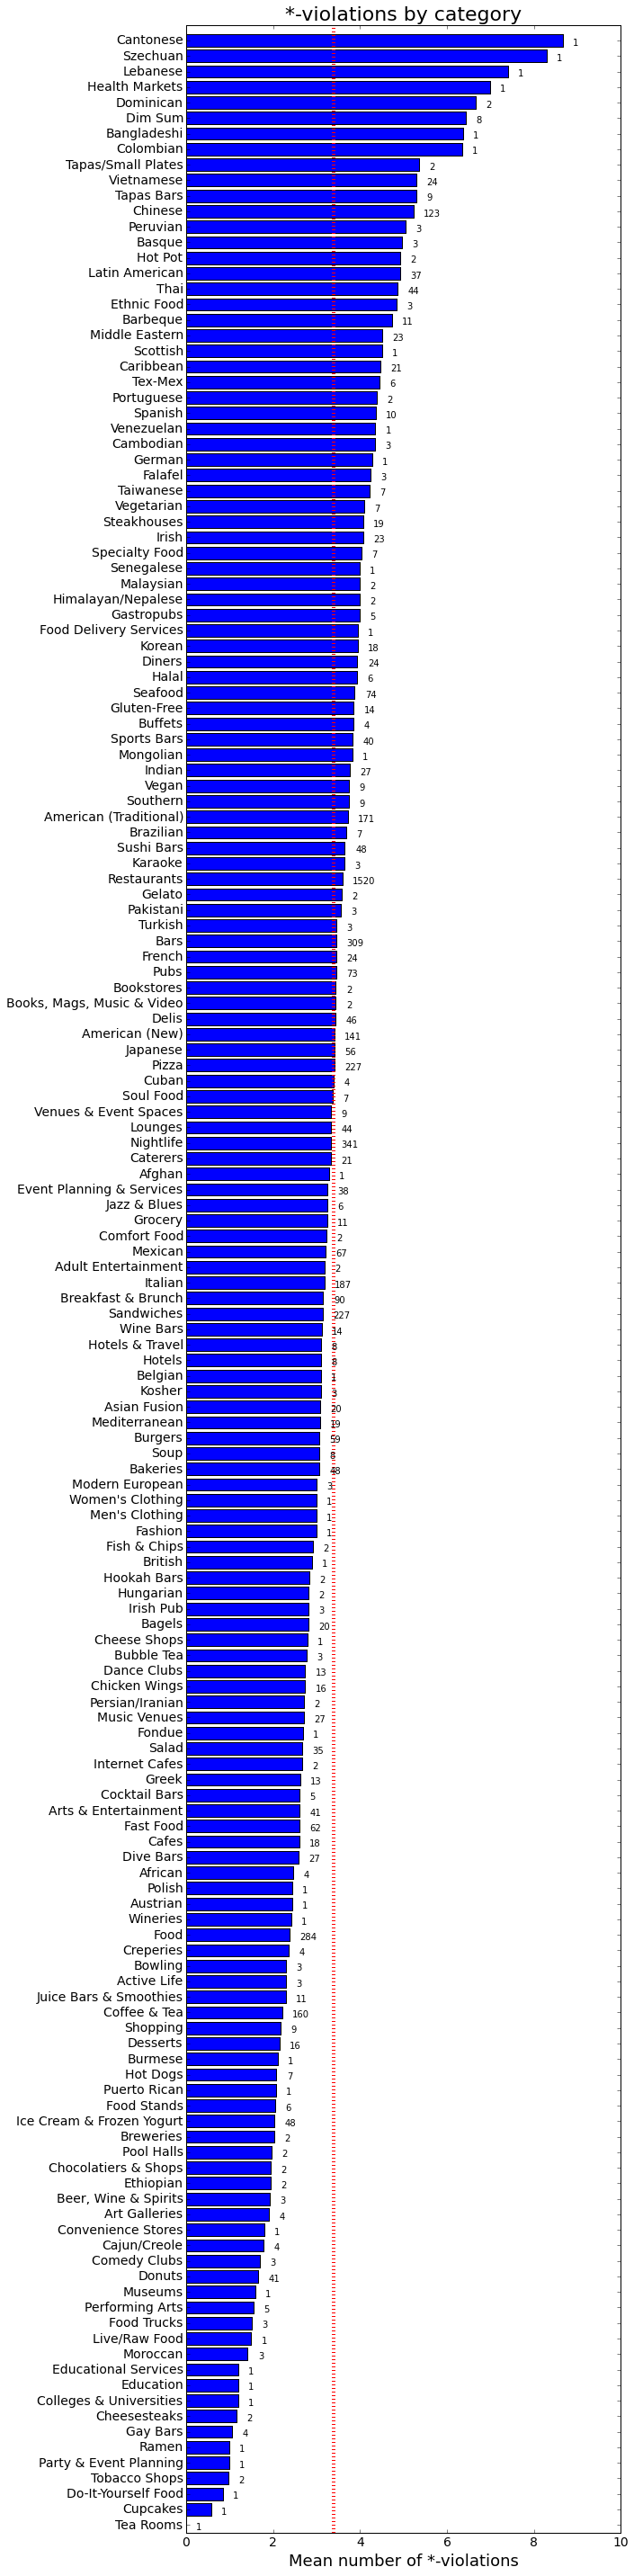

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 40))
plt.barh(range(len(labels)), violations, align='center')
plt.plot([3.4, 3.4], [-0.5, len(labels)], 'r:', lw=4)
for i, (num, vio) in enumerate(zip(num_rest, violations)):
    plt.text(vio + 0.25, i - 0.3, str(num), fontsize=10)
plt.xlim(0, 10)
plt.ylim(-0.5, len(labels))
plt.yticks(range(len(labels)), labels)
plt.title('*-violations by category')
plt.xlabel('Mean number of *-violations')
plt.tight_layout()

In [20]:
atts = set(biz_violations['attributes'].apply(lambda x: x.keys()).sum())
atts

{u'Accepts Credit Cards',
 u'Ages Allowed',
 u'Alcohol',
 u'Ambience',
 u'Attire',
 u'BYOB',
 u'BYOB/Corkage',
 u'By Appointment Only',
 u'Caters',
 u'Coat Check',
 u'Corkage',
 u'Delivery',
 u'Dietary Restrictions',
 u'Dogs Allowed',
 u'Drive-Thru',
 u'Good For',
 u'Good For Dancing',
 u'Good For Groups',
 u'Good For Kids',
 u'Good for Kids',
 u'Happy Hour',
 u'Has TV',
 u'Music',
 u'Noise Level',
 u'Open 24 Hours',
 u'Order at Counter',
 u'Outdoor Seating',
 u'Parking',
 u'Payment Types',
 u'Price Range',
 u'Smoking',
 u'Take-out',
 u'Takes Reservations',
 u'Waiter Service',
 u'Wheelchair Accessible',
 u'Wi-Fi'}

In [21]:
violation_label = []
for attribute in ['Dogs Allowed', 'Corkage', 'BYOB', 'Outdoor Seating', 'Takes Reservations', 'Has TV', 'Waiter Service', 'Order at Counter', 'Take-out', 'Delivery', 'Coat Check', 'Drive-Thru', 'Open 24 Hours', 'Wheelchair Accessible']:
    msk = biz_violations.attributes.apply(lambda x: attribute in x.keys())
    has_key = biz_violations[msk]
    msk = has_key.attributes.apply(lambda x: x[attribute])
    violation_label.append((has_key[msk]['*_mean'].mean(), has_key[msk].shape[0], has_key[~msk]['*_mean'].mean(), has_key[~msk].shape[0], attribute))
    pos_violations, pos_size, neg_violations, neg_size, labels = zip(*sorted(violation_label))

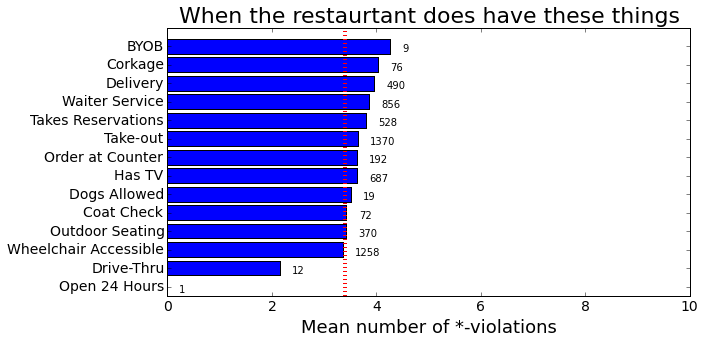

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.barh(range(len(labels)), pos_violations, align='center')
plt.plot([3.4, 3.4], [-0.5, len(labels)], 'r:', lw=4)
for i, (num, vio) in enumerate(zip(pos_size, pos_violations)):
    plt.text(vio + 0.25, i - 0.3, str(num), fontsize=10)
plt.xlim(0, 10)
plt.ylim(-0.5, len(labels))
plt.yticks(range(len(labels)), labels)
plt.title('When the restaurtant does have these things')
plt.xlabel('Mean number of *-violations')
plt.tight_layout()

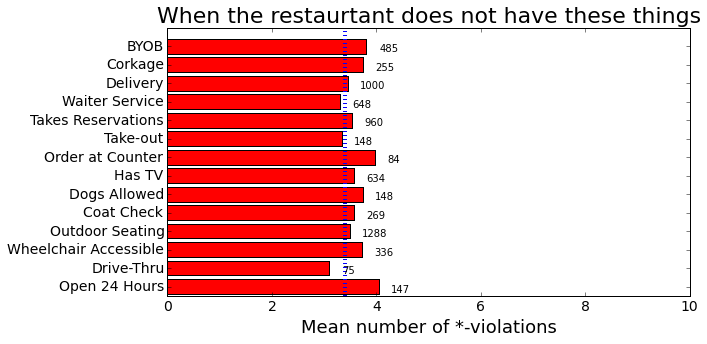

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.barh(range(len(labels)), neg_violations, align='center', color='r')
plt.plot([3.4, 3.4], [-0.5, len(labels)], 'b:', lw=4)
for i, (num, vio) in enumerate(zip(neg_size, neg_violations)):
    plt.text(vio + 0.25, i - 0.3, str(num), fontsize=10)
plt.xlim(0, 10)
plt.ylim(-0.5, len(labels))
plt.yticks(range(len(labels)), labels)
plt.title('When the restaurtant does not have these things')
plt.xlabel('Mean number of *-violations')
plt.tight_layout()

### How does the restaurant Yelp star rating vary with average number of violations?

(0, 6)

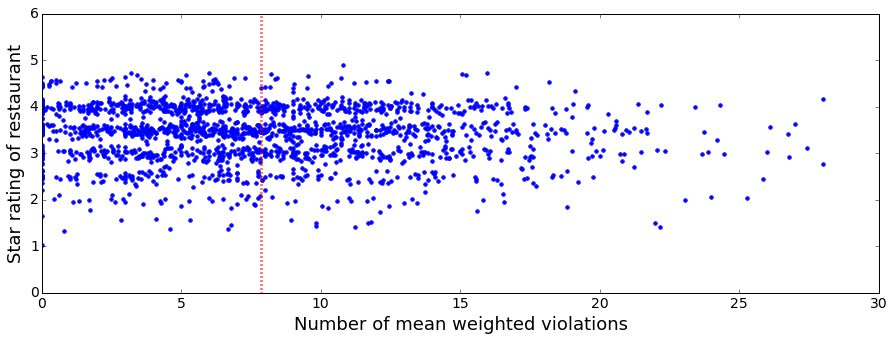

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
star_values = [star + np.random.normal(loc=0.0, scale=0.1) for star in biz_violations.stars]
plt.plot(biz_violations['weighted_violations_mean'], star_values, '.')
plt.plot([avg_violations.mean()[0], avg_violations.mean()[0]], [0, 6], 'r:', lw=3)
plt.xlabel('Number of mean weighted violations')
plt.ylabel('Star rating of restaurant')
plt.xlim(0, 30)
plt.ylim(0, 6)

In [25]:
print pearsonr(biz_violations['weighted_violations_mean'], biz_violations.stars)
print spearmanr(biz_violations['weighted_violations_mean'], biz_violations.stars)

(-0.086141823784440463, 0.00024339077469063728)
SpearmanrResult(correlation=-0.07716161243701164, pvalue=0.001018369179216703)


It is surprising that the star rating of the restaurant does not correlate with the mean number of violations. One would think that restaurants with lots of violations would get a low star rating while those with few would have a high rating.

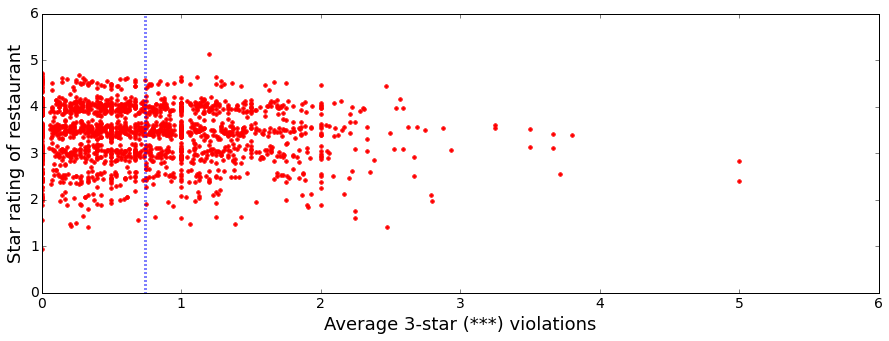

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
star_values = [star + np.random.normal(loc=0.0, scale=0.1) for star in biz_violations.stars]
plt.plot(biz_violations['***_mean'], star_values, '.', color='r')
plt.plot([avg_violations.mean()[5], avg_violations.mean()[5]], [0, 6], 'b:', lw=3)
plt.xlabel('Average 3-star (***) violations')
plt.ylabel('Star rating of restaurant')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.title('')

In [27]:
print pearsonr(biz_violations['***_mean'], biz_violations.stars)
print spearmanr(biz_violations['***_mean'], biz_violations.stars)

(-0.074182392238399508, 0.0015874956832724616)
SpearmanrResult(correlation=-0.056544566838907316, pvalue=0.016132657738677718)


### How does the review count vary with violations?

One may suspect that very good and very bad restaurants are the most written about. Again, here it would be nice to normalize by number of patrons per day or size of the restaurant. We do not have this data.

(0, 1500)

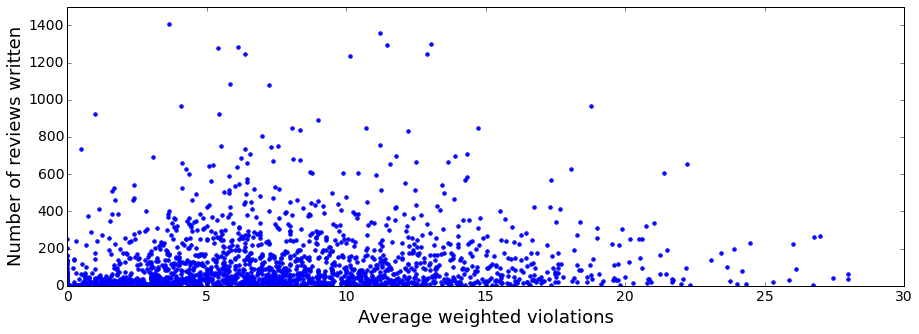

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(biz_violations['weighted_violations_mean'], biz_violations.review_count, '.')
plt.xlabel('Average weighted violations')
plt.ylabel('Number of reviews written')
plt.xlim(0, 30)
plt.ylim(0, 1500)

In [29]:
pearsonr(biz_violations['weighted_violations_mean'], biz_violations.review_count)

(0.05488756070729852, 0.019528334537080558)

(0, 1500)

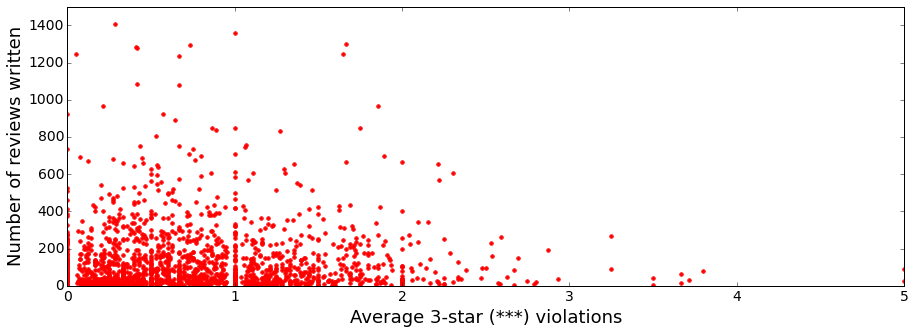

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(biz_violations[('***_mean')], biz_violations.review_count, '.', color='r')
plt.xlabel('Average 3-star (***) violations')
plt.ylabel('Number of reviews written')
plt.xlim(0, 5)
plt.ylim(0, 1500)

In [31]:
pearsonr(biz_violations[('***_mean')], biz_violations.review_count)

(0.03229567014011725, 0.169628308089629)

# Locations

We load the locations of the fire departments from https://www.cityofboston.gov/maps/:

In [32]:
df_fire = pd.read_csv('Fire_Departments.csv', encoding='utf_8-sig')

Above we computed the average number of violations by neighborhood. Here we look at how the restaurants are grouped by neighborhood:

In [33]:
df_biz.groupby('city').size()

city
Allston               105
Boston               1386
Brighton               94
Cambridge               1
Charlestown            29
Chestnut Hill           2
Dorchester             80
Dorchester Center      12
East Boston            17
Hyde Park               7
Jamaica Plain          71
Mattapan                5
Mission Hill            1
Roslindale             34
Roxbury                24
Roxbury Crossing       12
South Boston           12
West Roxbury           38
dtype: int64

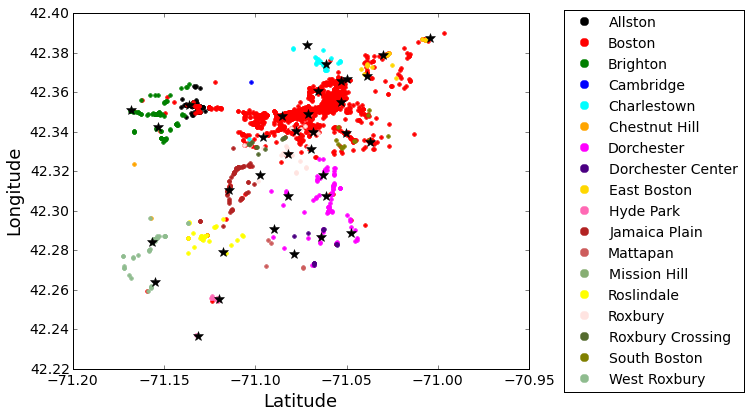

In [34]:
import matplotlib
colors, _ = zip(*matplotlib.colors.cnames.iteritems())
colors = ['black', 'red', 'green', 'blue', 'cyan', 'orange', 'magenta'] + list(colors)
for i, c in enumerate(np.sort(df_biz.city.unique())):
    plt.plot(df_biz[df_biz.city == c].longitude, df_biz[df_biz.city == c].latitude, '.', color=colors[i], label=c)
plt.plot(df_fire.X, df_fire.Y, 'k*', ms=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(bbox_to_anchor=(1.5, 1.05), markerscale=2)
plt.tight_layout()

The fire departments are shown as black stars for reference. They do not enter into the model.

### Load the crime data

In [56]:
df_crm = df_fire = pd.read_csv('../spark/Crime_Incident_Reports.csv', parse_dates=['FROMDATE'])
df_crm['x'] = df_crm.Location.apply(lambda x: eval(x)[0] if x != "(0.0, 0.0)" else np.nan)
df_crm['y'] = df_crm.Location.apply(lambda x: eval(x)[1] if x != "(0.0, 0.0)" else np.nan)
df_crm = df_crm[df_crm.x.notnull()]
df_crm.head(3).transpose()

,0,1,2
COMPNOS,1.2042e+08,1.20419e+08,1.20419e+08
NatureCode,BERPTA,PSHOT,ARMROB
INCIDENT_TYPE_DESCRIPTION,RESIDENTIAL BURGLARY,AGGRAVATED ASSAULT,ROBBERY
MAIN_CRIMECODE,05RB,04xx,03xx
REPTDISTRICT,D4,B2,D4
REPORTINGAREA,629,327,625
FROMDATE,2012-07-08 06:00:00,2012-07-08 06:03:00,2012-07-08 06:26:00
WEAPONTYPE,Other,Firearm,Firearm
Shooting,No,Yes,No
DOMESTIC,No,No,No


In [36]:
df_crm.describe()

,COMPNOS,REPORTINGAREA,Year,Month,X,Y,x,y
count,2.435490e+05,253075.000000,253075.000000,253075.000000,253075.000000,2.530750e+05,253075.000000,253075.000000
mean,1.353371e+08,256.491672,2013.491412,6.658536,768835.805070,2.943312e+06,42.323847,-71.083360
std,9.674583e+06,268.617262,0.949581,3.333379,8326.831475,1.159852e+04,0.031772,0.030869
min,1.105238e+08,0.000000,2012.000000,1.000000,743125.000000,2.909882e+06,42.232264,-71.178674
25%,1.301892e+08,0.000000,2013.000000,4.000000,764706.374400,2.934404e+06,42.299386,-71.098625
50%,1.307773e+08,174.000000,2013.000000,7.000000,770277.875700,2.945064e+06,42.328660,-71.078035
75%,1.420235e+08,440.000000,2014.000000,9.000000,774516.816100,2.952457e+06,42.349236,-71.062280
max,1.520498e+08,962.000000,2015.000000,12.000000,801019.000000,2.970000e+06,42.395105,-70.964365


In [37]:
df_crm.isnull().sum()

COMPNOS                        9526
NatureCode                     1474
INCIDENT_TYPE_DESCRIPTION         0
MAIN_CRIMECODE                    0
REPTDISTRICT                     56
REPORTINGAREA                     0
FROMDATE                          0
WEAPONTYPE                        0
Shooting                          0
DOMESTIC                          0
SHIFT                          9526
Year                              0
Month                             0
DAY_WEEK                          0
UCRPART                           0
X                                 0
Y                                 0
STREETNAME                       15
XSTREETNAME                  207967
Location                          0
x                                 0
y                                 0
dtype: int64

<matplotlib.colorbar.Colorbar instance at 0x12ad5cb48>

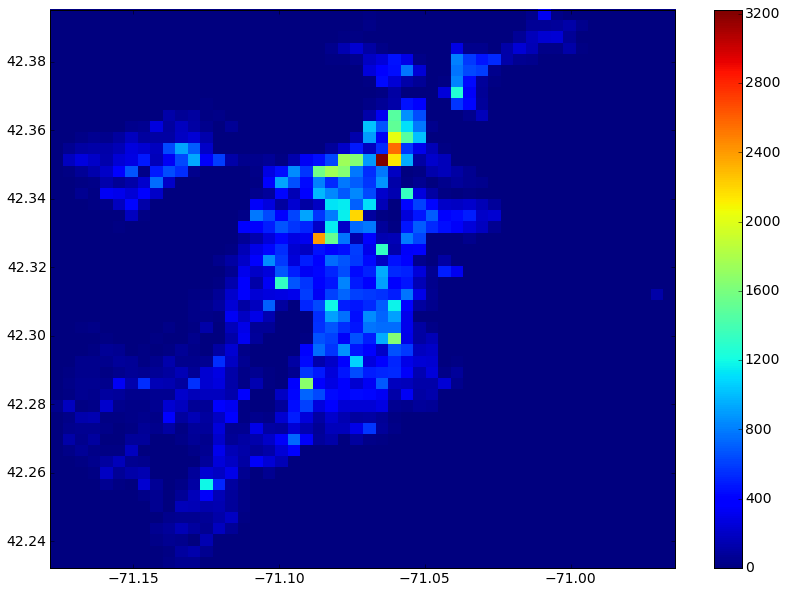

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
plt.hist2d(df_crm.y, df_crm.x, (50, 50), cmap=plt.cm.jet)
plt.colorbar()

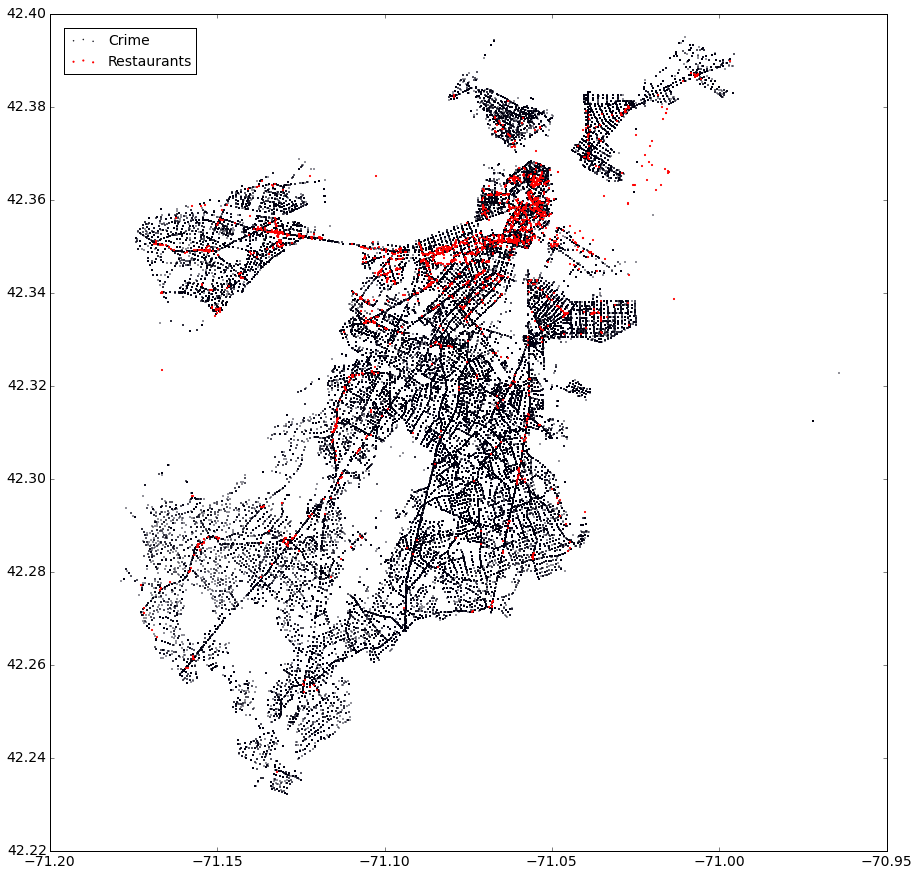

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plt.scatter(df_crm.y, df_crm.x, s=1, marker='.', label='Crime')
plt.scatter(df_biz.longitude, df_biz.latitude, s=5, marker='.', color='r', label='Restaurants')
plt.xlim(-71.20, -70.95)
plt.ylim(42.22, 42.40)
plt.legend(loc='upper left')

[None, None, None, None, None, None, None, None, None, None]

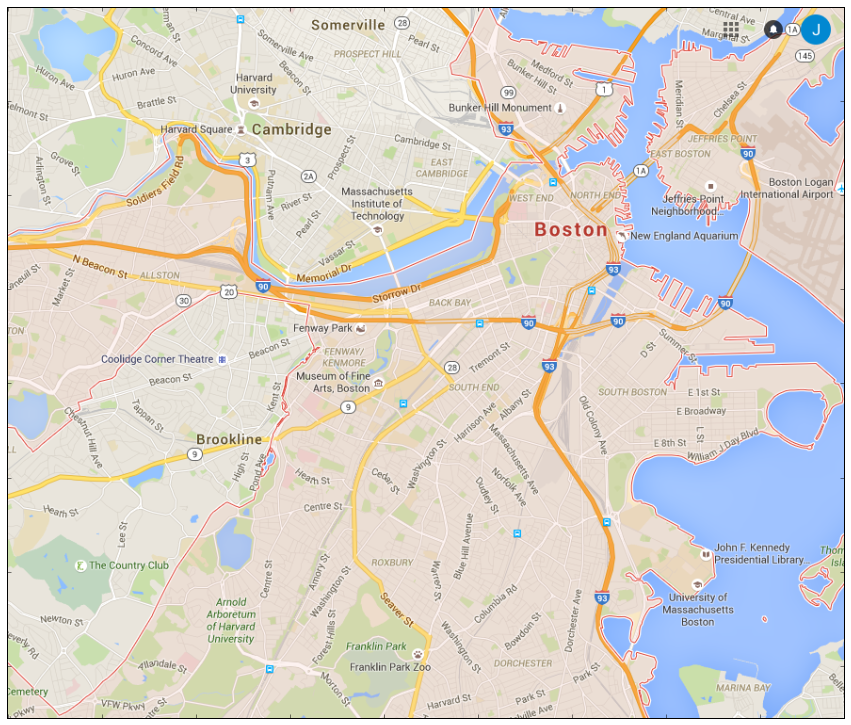

In [40]:
import matplotlib.image as mpimg
img = mpimg.imread('boston_map.png')
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
plt.imshow(img)
plt.setp(ax.get_xticklabels()[:], visible=False)
plt.setp(ax.get_yticklabels()[:], visible=False)

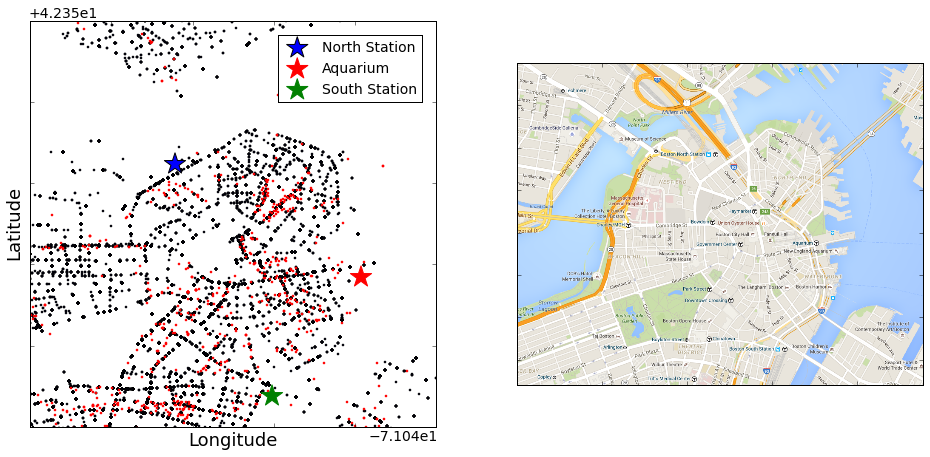

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
ax1.scatter(df_crm.y, df_crm.x, s=10, marker='.')
ax1.scatter(df_biz.longitude, df_biz.latitude, s=10, marker='.', color='r')
ax1.scatter([-71.0611], [42.3662], marker='*', s=500, label='North Station')
ax1.scatter([-71.0496], [42.3592], marker='*', s=500, label='Aquarium', color='r')
ax1.scatter([-71.0551], [42.3519], marker='*', s=500, label='South Station', color='g')
img = mpimg.imread('north_end.png')
ax2.imshow(img)
plt.setp(ax1.get_xticklabels()[:], visible=False)
plt.setp(ax1.get_yticklabels()[:], visible=False)
plt.setp(ax2.get_xticklabels()[:], visible=False)
plt.setp(ax2.get_yticklabels()[:], visible=False)
ax1.set_aspect('equal')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_xlim(-71.07, -71.045)
ax1.set_ylim(42.35, 42.375)
ax1.legend(scatterpoints=1)

### Walking distance squared between North and South Station (1.1 miles)

In [42]:
# cutoff radius is 1/20 the distance between the train stations
# "obscured to the street segment centroid for privacy"
d_sq = (42.3519 - 42.3662)**2 + (-71.0551 + 71.0611)**2
d_sq_cutoff = d_sq / 400

### Approximate Haversine distance by Euclidean; Assign crimes to a 2-d grid for efficiency

In [43]:
# the crime data has more extreme values than the business location data so only use crime data here
x_min, x_max = 0.99 * df_crm.x.min(), df_crm.x.max()
y_min, y_max = df_crm.y.min(), 0.99 * df_crm.y.max()

In [44]:
# define properties of the grid
x_num_cells = int((x_max - x_min) / np.sqrt(d_sq_cutoff))
x_cell_size = (x_max - x_min) / x_num_cells
y_num_cells = int((y_max - y_min) / np.sqrt(d_sq_cutoff))
y_cell_size = (y_max - y_min) / y_num_cells

In [45]:
grid = [[] for i in range(x_num_cells * y_num_cells)]
for index_j, crm in df_crm.iterrows():
    idx = int((crm.x - x_min) / x_cell_size) + int((crm.y - y_min) / y_cell_size) * x_num_cells
    grid[idx].append((crm.x, crm.y))

In [46]:
ct_id_stars = []
for index_i, biz in df_biz.iterrows():
    ct = 0
    idx = int((biz['latitude'] - x_min) / x_cell_size) + int((biz['longitude'] - y_min) / y_cell_size) * x_num_cells
    neighbors = [idx, idx + 1, idx - 1, idx + x_num_cells, idx - x_num_cells, idx + x_num_cells + 1, idx + x_num_cells - 1, idx - x_num_cells + 1, idx - x_num_cells - 1]
    for neighbor in neighbors:
        for x, y in grid[neighbor]:
            if (x - biz['latitude'])**2 + (y - biz['longitude'])**2 < d_sq_cutoff: ct += 1
    ct_id_stars.append((ct, biz.business_id, biz.stars))

In [47]:
f = open('crime_density.csv', 'w')
for a, b, c in ct_id_stars:
    f.write('%s,%s,%s\n' % (a, b, c))
f.close()

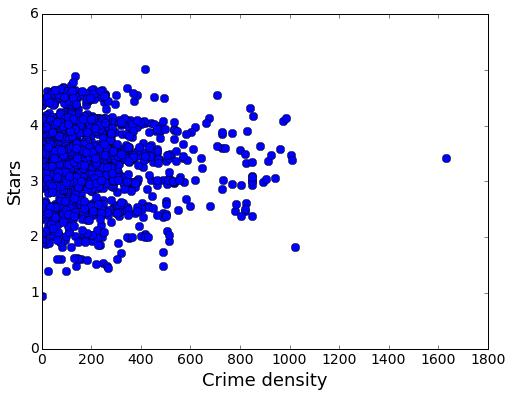

In [48]:
df_crm_den = pd.DataFrame(ct_id_stars, columns = ['crime_density', 'business_id', 'stars'])
plt.plot(df_crm_den.crime_density, df_crm_den.stars + np.random.normal(0, 0.1, size=len(df_crm_den.stars)), 'o')
plt.xlabel('Crime density')
plt.ylabel('Stars')

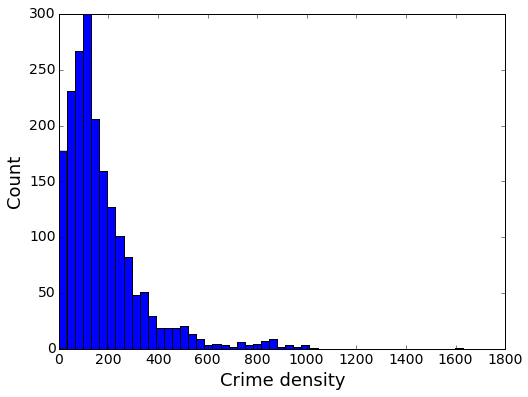

In [49]:
plt.hist(df_crm_den.crime_density, bins=50)
plt.xlabel('Crime density')
plt.ylabel('Count')

In [50]:
cb = pd.merge(df_crm_den, biz_violations, on='business_id', how='inner')
cb.head(2).transpose()

,0,1
crime_density,40,56
business_id,Jp9svt7sRT4zwdbzQ8KQmw,CgdK8DiyX9Y4kTKEPi_qgA
stars_x,3.5,4
restaurant_id,N6Ok7qOx,p03824Om
attributes,"{u'Price Range': 1, u'Accepts Credit Cards': T...","{u'Take-out': True, u'Price Range': 1, u'Outdo..."
categories,"[Bakeries, Food, Event Planning & Services, Ca...","[Delis, Restaurants, Event Planning & Services..."
city,Boston,Boston
full_address,"75 Federal Street\nFinancial District\nBoston,...","8 City Hall Ave\nBeacon Hill\nBoston, MA 02108"
hours,{},"{u'Tuesday': {u'close': u'15:00', u'open': u'0..."
latitude,42.3551,42.3575


(0, 1000)

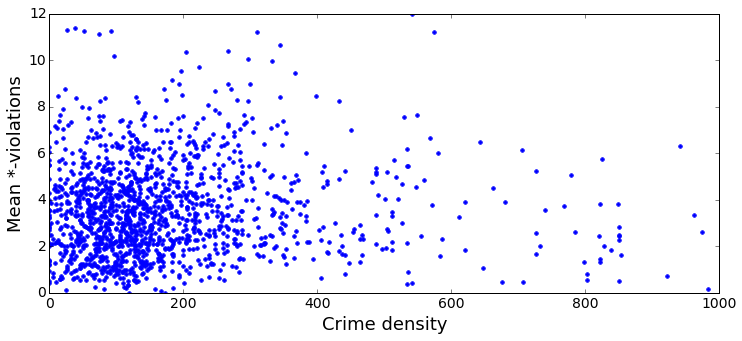

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
plt.plot(cb[cb['*_size'] > 5].crime_density, cb[cb['*_size'] > 5]['*_mean'], '.')
plt.xlabel('Crime density')
plt.ylabel('Mean *-violations')
plt.xlim(0, 1000)

In [52]:
print pearsonr(cb[cb['*_size'] > 5].crime_density, cb[cb['*_size'] > 5]['*_mean'])
print spearmanr(cb[cb['*_size'] > 5].crime_density, cb[cb['*_size'] > 5]['*_mean'])

(0.042012219101339794, 0.10630133712080603)
SpearmanrResult(correlation=0.084807316876221242, pvalue=0.0010960895348026268)


### Conclusions

The Yelp business metadata give insight into the number of violations. The categories and neighborhoods are particularly useful. The crime density feature proved to be non-discriminatory.